In [1]:
import tensorflow as tf
import os

In [2]:
!pip list
!pip install opencv-python
!pip install matplotlib

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
bcrypt                        3.2.0
beautiful

In [3]:
print(tf.config.list_physical_devices('GPU'))

[]


In [4]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [5]:
import cv2
import imghdr

In [6]:
os.listdir('data/adolescent 11-15/fMRI')

['Autism', 'Control']

In [7]:
datadir='data/adolescent 11-15/fMRI'

In [8]:
import matplotlib.pyplot as plt

In [9]:
'''for image_class in os.listdir(datadir):
    for image in os.listdir(os.path.join(datadir,image_class)):
        #print(image)
        image_path=os.path.join(datadir,image_class,image)
        img=cv2.imread(image_path)
        print(img.shape)'''
        

'for image_class in os.listdir(datadir):\n    for image in os.listdir(os.path.join(datadir,image_class)):\n        #print(image)\n        image_path=os.path.join(datadir,image_class,image)\n        img=cv2.imread(image_path)\n        print(img.shape)'

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(datadir): 
    for image in os.listdir(os.path.join(datadir, image_class)):
        image_path = os.path.join(datadir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [12]:
#img=cv2.imread(os.path.join(datadir,'Autism','ABIDE_50002_MRI_MP-RAGE_br_raw_20120830172854796_S164623_I328631-0139.jpg'))
#img.shape
#plt.imshow(img)

In [13]:
data=tf.keras.utils.image_dataset_from_directory(datadir)

Found 1828 files belonging to 2 classes.


In [14]:
data_iterator=data.as_numpy_iterator()

In [15]:
len(data)

58

In [16]:
'''for i in range(len(data)):
    print(batch[1])
    batch=data_iterator.next()'''

'for i in range(len(data)):\n    print(batch[1])\n    batch=data_iterator.next()'

In [17]:
batch=data_iterator.next()

In [18]:
batch

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [19]:
def count_1(data_iterator):
    count=0
    for batch in data_iterator:
        #print((batch[1]))
        #print(type(batch[1]))
        #print(len(batch[1]))
        for i in batch[1]:
            if i==1:
                count+=1
        
    print(count)

In [20]:
#count_1(data_iterator) # 0 :autism ,1 : control

In [21]:
batch[1]

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [22]:
batch[0].max()

255.0

In [23]:
batch[0].min()

0.0

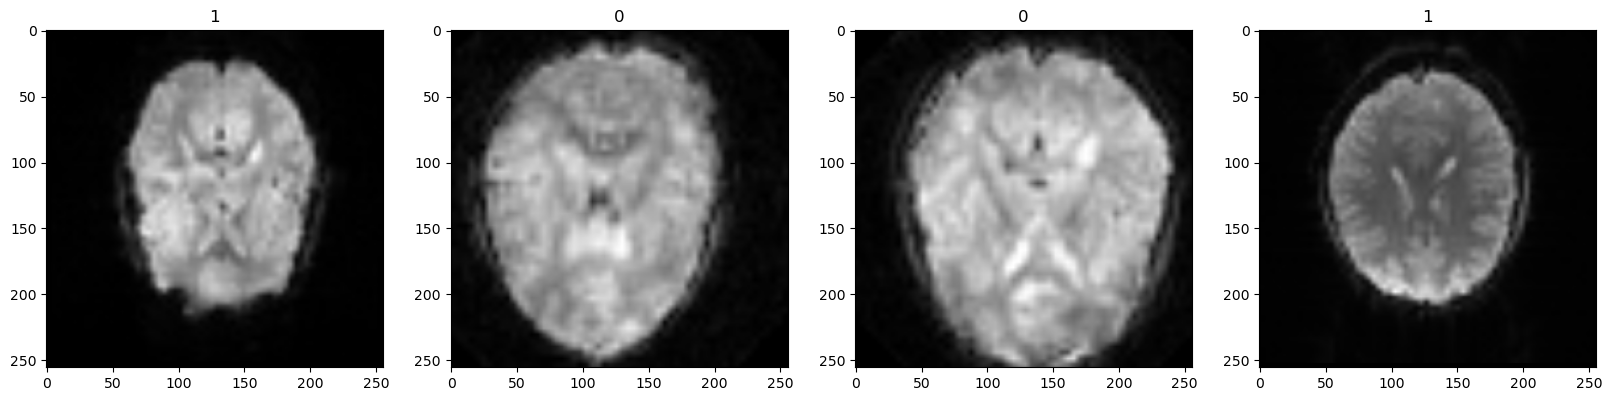

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [25]:
data = data.map(lambda x,y: (x/255, y))

In [26]:
batch=data.as_numpy_iterator().next()

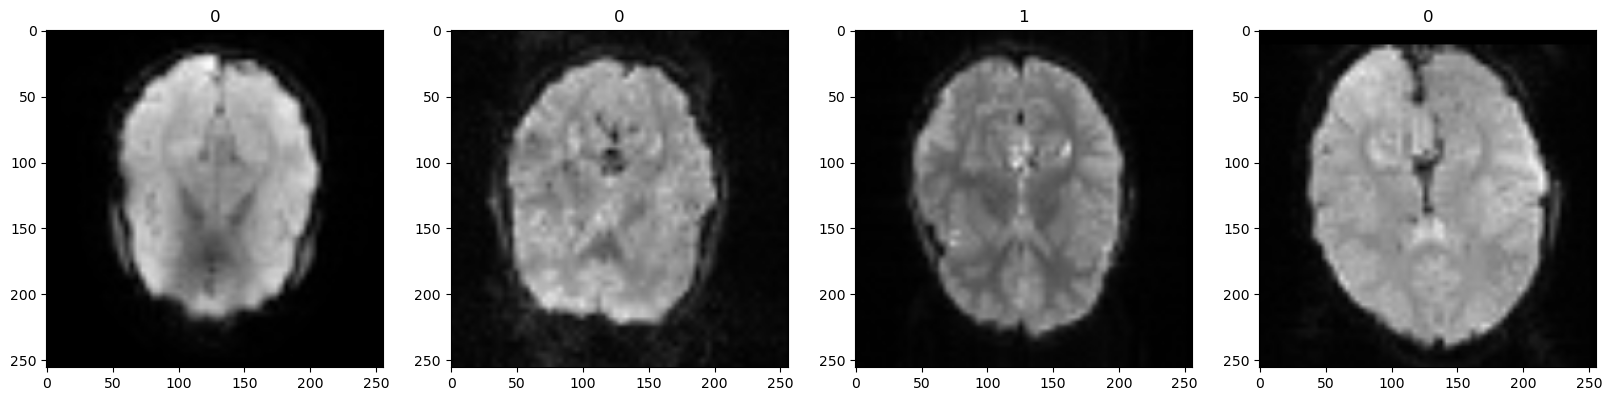

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [28]:
batch[0].min(),batch[0].max()

(0.0, 1.0)

In [29]:
len(data)

58

In [30]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [31]:
train_size,val_size,test_size

(34, 11, 11)

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Model building

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
34/34 [==============================] - 45s 1s/step - loss: 0.7197 - accuracy: 0.5119 - val_loss: 0.6780 - val_accuracy: 0.6051
Epoch 2/20
34/34 [==============================] - 45s 1s/step - loss: 0.6800 - accuracy: 0.5671 - val_loss: 0.6561 - val_accuracy: 0.6392
Epoch 3/20
34/34 [==============================] - 48s 1s/step - loss: 0.6608 - accuracy: 0.6075 - val_loss: 0.6422 - val_accuracy: 0.6278
Epoch 4/20
34/34 [==============================] - 45s 1s/step - loss: 0.6397 - accuracy: 0.6314 - val_loss: 0.6328 - val_accuracy: 0.6193
Epoch 5/20
34/34 [==============================] - 45s 1s/step - loss: 0.6094 - accuracy: 0.6572 - val_loss: 0.6918 - val_accuracy: 0.5597
Epoch 6/20
34/34 [==============================] - 46s 1s/step - loss: 0.5859 - accuracy: 0.6976 - val_loss: 0.7148 - val_accuracy: 0.5341
Epoch 7/20
34/34 [==============================] - 47s 1s/step - loss: 0.5577 - accuracy: 0.7169 - val_loss: 0.5511 - val_accuracy: 0.6847
Epoch 8/20
34/34 [==

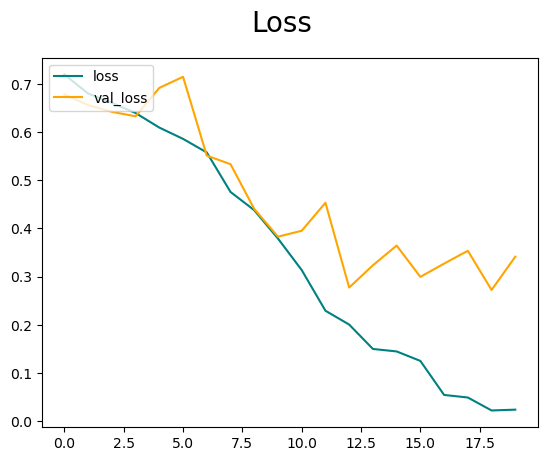

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

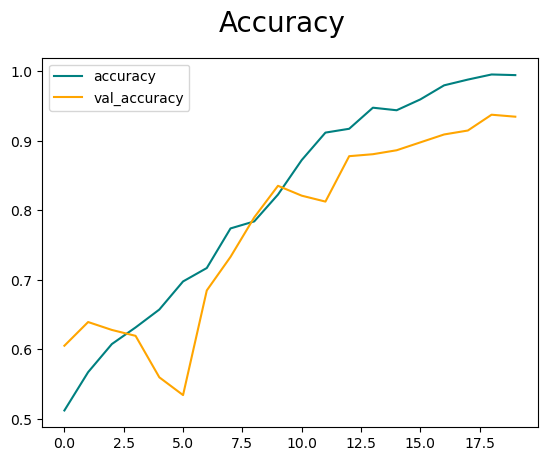

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 167ms/step


In [47]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.92268044, shape=(), dtype=float32) tf.Tensor(0.9040404, shape=(), dtype=float32) tf.Tensor(0.90340906, shape=(), dtype=float32)


In [48]:
yhat=[1 if (i[0])>0.5 else 0 for i in yhat]

In [49]:
yhat

[1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1]

In [50]:
list(y)

[1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1]

In [51]:
for i in range(len(y)):
    if yhat[i]!=y[i]:
        print(i)

4
5
7
20


In [52]:
len(y)

32

In [53]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','adolescent_fMRI_imageclassifier.h5'))

C:\anaconda\envs\mamtadi1\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
